# Influence of Employment on price of houses

**Authored by**: Dhruvil Mehta

**Duration**: 90 mins

**Level**: Intermediate

**Pre-requisite Skills**: Python, Pandas, Matplotlib

### Scenario
As a data analyst, I want to identify meaningful patterns and groupings within a dataset combining health care employment and median house prices, so that I can understand how these factors correlate and provide actionable insights for stakeholders.

### What this use case will teach you
At the end of this use case, you will have demonstrated the following skills:

- Preprocessing and scaling datasets for clustering.

- Identifying the optimal number of clusters using the Elbow Method and Silhouette Score.

- Applying K-Means clustering and interpreting its results.

- Visualizing cluster distributions and analyzing cluster characteristics.

- Exporting and documenting results for further analysis.

### Background and Introduction
In this use case, we aim to uncover hidden patterns in a dataset that combines information about health care employment and median house prices. The problem lies in understanding whether regions with high health care employment also correspond to certain house price brackets or other socioeconomic factors. By clustering this data, we can identify groupings that highlight potential relationships between these variables.

The dataset, sourced from the Week 3 analysis (eda_results_week3.csv), contains information about various features such as health care employment rates, median house prices, and other socioeconomic indicators. This use case will leverage clustering techniques like K-Means to segment the dataset into distinct groups and analyze their characteristics.

This approach is valuable for decision-makers in urban planning, real estate investment, and social policy, as it provides a data-driven way to classify and compare different regions based on health care employment and housing data.





Merged Data:
   Census year  Block ID CLUE small area  Accommodation and Food Services  \
0         2018      2501      kensington                              0.0   
1         2018      2501      kensington                              0.0   
2         2018      2501      kensington                              0.0   
3         2018      2501      kensington                              0.0   
4         2018      2501      kensington                              0.0   

   Administrative and Support Services  Agriculture, Forestry and Fishing  \
0                                  0.0                                0.0   
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   

   Arts and Recreation Services  Construction  Education and 

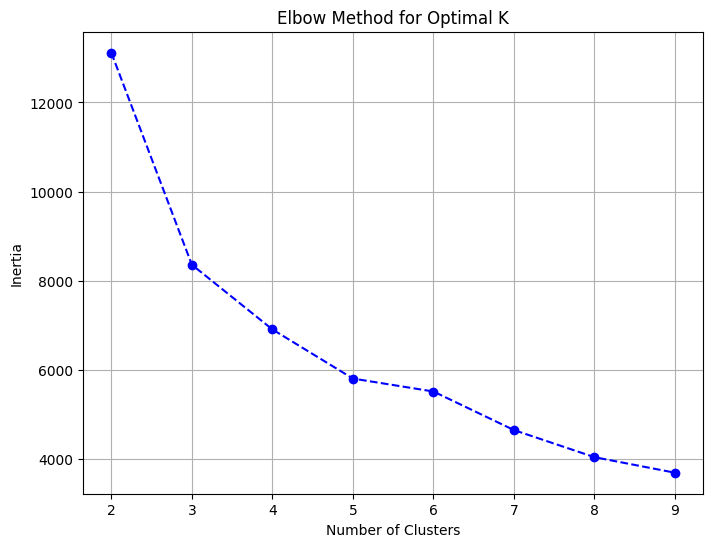

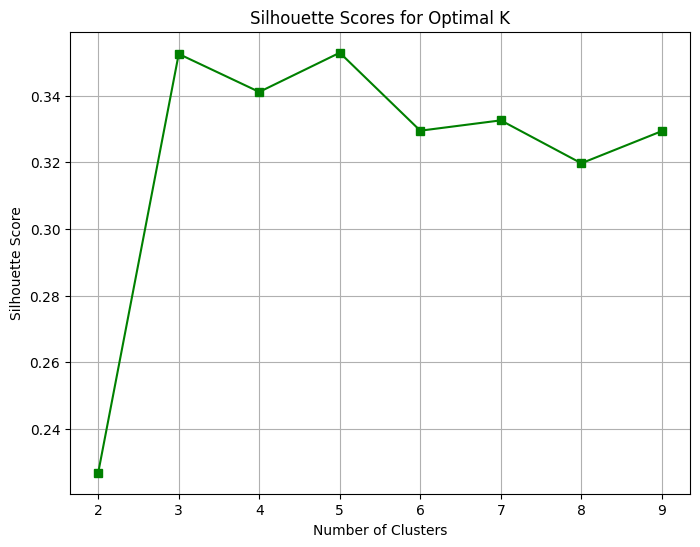

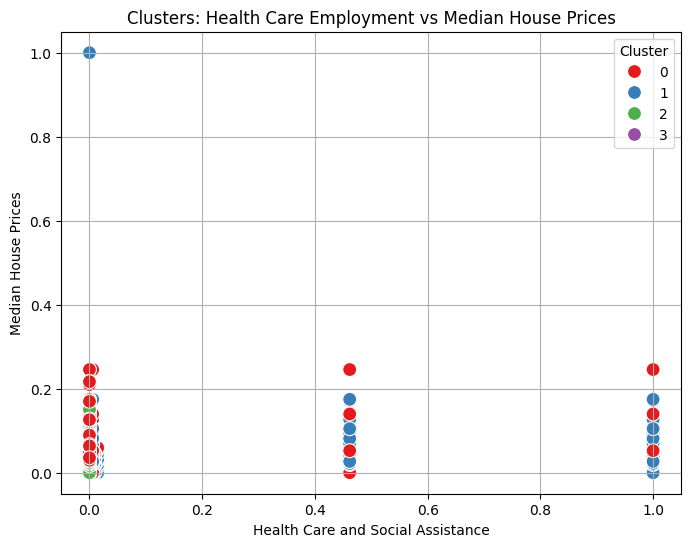

Cluster Characteristics:
         Census year     Block ID  Accommodation and Food Services  \
Cluster                                                              
0        2012.802140   576.306230                         0.006263   
1        2005.895512   575.646245                         0.012672   
2        2017.451779   564.991261                         0.001279   
3        2014.829032  2516.470968                         0.000000   

         Administrative and Support Services  \
Cluster                                        
0                                   0.258997   
1                                   0.464181   
2                                   0.000000   
3                                   0.000000   

         Agriculture, Forestry and Fishing  Arts and Recreation Services  \
Cluster                                                                    
0                                      0.0                      6.868798   
1                                    

<Figure size 1200x800 with 0 Axes>

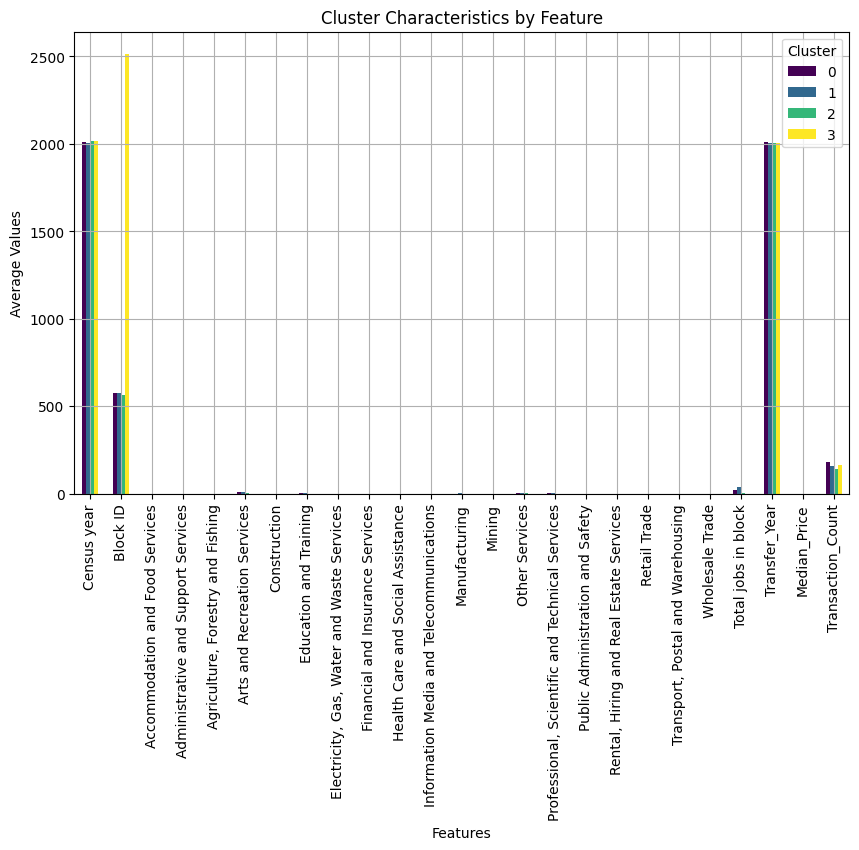

Clustered data saved to 'clustered_data_week4.csv'.


In [1]:
# Step 1: Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Step 2: Loading the dataset from Week 3
merged_data = pd.read_csv('eda_results_week3.csv')

# Step 3: Displaying the first few rows to confirm loading
print("Merged Data:")
print(merged_data.head())

# Step 4: Preprocessing for Clustering
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Step 5: Standardizing data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_data[numeric_columns])

# Step 6: Determining Optimal Number of Clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 10)  

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Step 7: Plotting Elbow Method for Inertia
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Step 8: Plotting Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='s', linestyle='-', color='g')
plt.title("Silhouette Scores for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 9: Applying K-Means with Optimal K (e.g., k=4 based on analysis)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(scaled_data)

# Step 10: Adding cluster labels to the original dataset
merged_data['Cluster'] = kmeans.labels_

# Step 11: Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=merged_data['Health Care and Social Assistance'],
    y=merged_data['Median_Price'],
    hue=merged_data['Cluster'],
    palette='Set1',
    s=100
)
plt.title("Clusters: Health Care Employment vs Median House Prices")
plt.xlabel("Health Care and Social Assistance")
plt.ylabel("Median House Prices")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Step 12: Clustering Characteristics Analysis
cluster_means = merged_data.groupby('Cluster')[numeric_columns].mean()
print("Cluster Characteristics:")
print(cluster_means)

# Step 13: Visualizing Cluster Characteristics
plt.figure(figsize=(12, 8))
cluster_means.T.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Cluster Characteristics by Feature")
plt.xlabel("Features")
plt.ylabel("Average Values")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Step 14: Saving Updated Dataset with Clusters
merged_data.to_csv('clustered_data_week4.csv', index=False)
print("Clustered data saved to 'clustered_data_week4.csv'.")


### References

- https://data.melbourne.vic.gov.au/explore/dataset/employment-by-block-by-anzsic/information/
- https://data.melbourne.vic.gov.au/explore/dataset/house-prices-by-small-area-transfer-year/information/